In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
from scipy import stats
import sklearn
import sklearn.linear_model
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier
from keras import Sequential
from keras.layers import Dense

##### Data preparation and visulization

In [3]:
#  import ROOT
# from root_pandas import read_root  # not working

##### Tryiny to use uproot 

In [1]:
import uproot

In [3]:
file1 = uproot.open('/Users/bhimbam/Documents/root_exercise/ADDGravToGG_NegInt-0_LambdaT-10000_M-500To1000_TuneCP2_13TeV-pythia8_Signal_2018.root:exoeff/fTree')
file1.keys()

['Event',
 'GenPhoton1',
 'GenPhoton2',
 'Photon1',
 'Photon2',
 'Vertex0',
 'PrimaryVertex',
 'nPV',
 'BeamSpot']

In [4]:
file2 = uproot.open('/Users/bhimbam/Documents/root_exercise/ExoEfficiency.root:exoeff/fTree')

In [7]:
print(file2.show())

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
Event                | struct {int64_t run; ... | AsDtype("[('run', '>i8'), (...
GenPhoton1           | struct {double pt; do... | AsDtype("[('pt', '>f8'), ('...
GenPhoton2           | struct {double pt; do... | AsDtype("[('pt', '>f8'), ('...
Photon1              | struct {double pt; do... | AsDtype("[('pt', '>f8'), ('...
Photon2              | struct {double pt; do... | AsDtype("[('pt', '>f8'), ('...
Vertex0              | struct {double vx; do... | AsDtype("[('vx', '>f8'), ('...
PrimaryVertex        | struct {double vx; do... | AsDtype("[('vx', '>f8'), ('...
nPV                  | int32_t                  | AsDtype('>i4')
BeamSpot             | struct {double x0; do... | AsDtype("[('x0', '>f8'), ('...
None


In [12]:
# Pandas data frame
file11 = file1.arrays(filter_name='Photon1',library="pd")
file21 = file2.arrays(filter_name='Photon1',library="pd")
file31 = file1.arrays(filter_name='Event',library="pd")
file41 = file2.arrays(filter_name='Event',library="pd")

In [13]:
file11.columns

MultiIndex([('Photon1',                    'pt'),
            ('Photon1',                   'eta'),
            ('Photon1',                   'phi'),
            ('Photon1',                 'scEta'),
            ('Photon1',                 'scPhi'),
            ('Photon1',                   'rho'),
            ('Photon1',       'chargedHadIso03'),
            ('Photon1',       'neutralHadIso03'),
            ('Photon1',           'photonIso03'),
            ('Photon1', 'rhoCorChargedHadIso03'),
            ('Photon1', 'rhoCorNeutralHadIso03'),
            ('Photon1',     'rhoCorPhotonIso03'),
            ('Photon1',        'corPhotonIso03'),
            ('Photon1',        'hadTowerOverEm'),
            ('Photon1',        'hadronicOverEm'),
            ('Photon1',                    'r9'),
            ('Photon1',                'r9_5x5'),
            ('Photon1',         'sigmaIetaIeta'),
            ('Photon1',      'sigmaIetaIeta5x5'),
            ('Photon1',           'sigmaEtaEta'),


In [14]:
df1 = file11['Photon1']
df2 = file21['Photon1']
df3 = file31['Event']
df4 = file41['Event']

In [15]:
df1

,pt,eta,phi,scEta,scPhi,rho,chargedHadIso03,neutralHadIso03,photonIso03,rhoCorChargedHadIso03,...,passCorPhoIso,passSieie,passHighPtID,passChIsoDenom,passCorPhoIsoDenom,isFakeable,isNumeratorObjCand,isDenominatorObj,isSaturated,isMCTruthFake
0,220.762405,-0.735523,-1.049120,-0.715418,-1.048901,14.294569,0.428706,0.000000,1.233039,-9999.99,...,True,True,True,True,True,False,True,False,False,False
1,236.207764,-1.952134,2.741965,-1.946771,2.741516,15.092347,0.644306,0.852919,0.436530,-9999.99,...,True,True,False,True,True,False,False,False,False,False
2,354.996368,-1.902470,2.003590,-1.898390,2.003318,12.200383,0.000000,0.878268,6.021924,-9999.99,...,False,True,False,True,True,False,False,False,False,False
3,75.301414,-1.795536,1.942707,-1.792584,1.942481,9.699908,0.154902,0.142267,0.953050,-9999.99,...,True,True,True,True,True,False,True,False,False,False
4,55.293568,0.278994,-2.858710,0.242339,-2.858976,26.226381,1.060323,0.000000,2.482864,-9999.99,...,True,True,True,True,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,-9999.990000,-9999.990000,-9999.990000,-9999.990000,-9999.990000,-9999.990000,-9999.990000,-9999.990000,-9999.990000,-9999.99,...,False,False,False,False,False,False,False,False,False,False
99996,108.382950,0.054887,0.227546,0.072264,0.227823,32.863297,1.458090,2.905464,0.596824,-9999.99,...,True,True,False,True,True,False,False,True,False,False
99997,161.466736,0.032349,-1.491545,0.042238,-1.491445,24.740841,0.000000,0.000000,1.372492,-9999.99,...,True,True,True,True,True,False,True,False,False,False
99998,252.161209,0.117316,0.444335,0.151522,0.444572,28.153032,2.661762,8.643819,2.300514,-9999.99,...,True,True,True,True,True,False,True,False,False,False


In [16]:
df5 = pd.concat([df1, df3], axis=1)
df6 = pd.concat([df2, df4], axis=1)

In [17]:
df5

,pt,eta,phi,scEta,scPhi,rho,chargedHadIso03,neutralHadIso03,photonIso03,rhoCorChargedHadIso03,...,weightLumi,weightAll,interactingParton1PdgId,interactingParton2PdgId,pdf_id1,pdf_id2,npv_true,beamHaloIDLoose,beamHaloIDTight,beamHaloIDTight2015
0,220.762405,-0.735523,-1.049120,-0.715418,-1.048901,14.294569,0.428706,0.000000,1.233039,-9999.99,...,-99999.992188,-99999.992188,-99999,-99999,2,-2,23,False,False,False
1,236.207764,-1.952134,2.741965,-1.946771,2.741516,15.092347,0.644306,0.852919,0.436530,-9999.99,...,-99999.992188,-99999.992188,-99999,-99999,-2,2,21,False,False,False
2,354.996368,-1.902470,2.003590,-1.898390,2.003318,12.200383,0.000000,0.878268,6.021924,-9999.99,...,-99999.992188,-99999.992188,-99999,-99999,-2,2,26,False,False,False
3,75.301414,-1.795536,1.942707,-1.792584,1.942481,9.699908,0.154902,0.142267,0.953050,-9999.99,...,-99999.992188,-99999.992188,-99999,-99999,2,-2,25,False,False,False
4,55.293568,0.278994,-2.858710,0.242339,-2.858976,26.226381,1.060323,0.000000,2.482864,-9999.99,...,-99999.992188,-99999.992188,-99999,-99999,-2,2,45,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,-9999.990000,-9999.990000,-9999.990000,-9999.990000,-9999.990000,-9999.990000,-9999.990000,-9999.990000,-9999.990000,-9999.99,...,-99999.992188,-99999.992188,-99999,-99999,-2,2,38,False,False,False
99996,108.382950,0.054887,0.227546,0.072264,0.227823,32.863297,1.458090,2.905464,0.596824,-9999.99,...,-99999.992188,-99999.992188,-99999,-99999,4,-4,46,False,False,False
99997,161.466736,0.032349,-1.491545,0.042238,-1.491445,24.740841,0.000000,0.000000,1.372492,-9999.99,...,-99999.992188,-99999.992188,-99999,-99999,2,-2,42,False,False,False
99998,252.161209,0.117316,0.444335,0.151522,0.444572,28.153032,2.661762,8.643819,2.300514,-9999.99,...,-99999.992188,-99999.992188,-99999,-99999,2,-2,30,False,False,False


In [18]:
df6

,pt,eta,phi,scEta,scPhi,rho,chargedHadIso03,neutralHadIso03,photonIso03,rhoCorChargedHadIso03,...,weightLumi,weightAll,interactingParton1PdgId,interactingParton2PdgId,pdf_id1,pdf_id2,npv_true,beamHaloIDLoose,beamHaloIDTight,beamHaloIDTight2015
0,125.490379,1.029156,-2.175756,1.026527,-2.175865,15.745706,0.997579,1.487268,1.749827,-9999.99,...,-99999.992188,-99999.992188,-99999,-99999,2,-2,41,False,False,True
1,461.181000,1.294560,1.106017,1.293692,1.106085,46.124050,0.000000,0.000000,2.697082,-9999.99,...,-99999.992188,-99999.992188,-99999,-99999,2,-2,51,False,False,False
2,338.327087,-0.473823,-2.820184,-0.480533,-2.820440,34.669067,1.130038,0.000000,3.434371,-9999.99,...,-99999.992188,-99999.992188,-99999,-99999,-2,2,50,False,False,False
3,313.911682,1.281855,0.966435,1.270770,0.966546,45.016102,0.000000,0.911006,4.035452,-9999.99,...,-99999.992188,-99999.992188,-99999,-99999,2,-2,52,False,False,False
4,97.729622,-0.027648,1.809882,0.002676,1.809738,32.293472,0.354917,1.875271,3.032410,-9999.99,...,-99999.992188,-99999.992188,-99999,-99999,-2,2,54,False,False,True
5,370.828278,-0.783220,-2.399389,-0.806746,-2.399557,36.897232,1.858191,1.863300,2.740664,-9999.99,...,-99999.992188,-99999.992188,-99999,-99999,-2,2,51,False,False,False
6,87.298897,0.029767,-2.459968,0.042845,-2.460154,34.116501,0.000000,3.577275,1.094572,-9999.99,...,-99999.992188,-99999.992188,-99999,-99999,2,-2,64,False,False,False
7,105.914192,-1.072385,-1.829374,-1.079390,-1.829376,44.280678,0.283819,0.000000,3.822777,-9999.99,...,-99999.992188,-99999.992188,-99999,-99999,-2,2,59,False,False,False
8,417.435150,-0.534054,-2.775139,-0.505358,-2.775390,41.022594,0.000000,0.977846,1.282100,-9999.99,...,-99999.992188,-99999.992188,-99999,-99999,-2,2,49,True,True,True
9,141.319321,1.276435,1.351308,1.271205,1.351299,36.231747,0.000000,1.247128,2.820728,-9999.99,...,-99999.992188,-99999.992188,-99999,-99999,-2,2,61,False,False,False


In [19]:
df = pd.concat([df5, df6,],ignore_index=True)
df

,pt,eta,phi,scEta,scPhi,rho,chargedHadIso03,neutralHadIso03,photonIso03,rhoCorChargedHadIso03,...,weightLumi,weightAll,interactingParton1PdgId,interactingParton2PdgId,pdf_id1,pdf_id2,npv_true,beamHaloIDLoose,beamHaloIDTight,beamHaloIDTight2015
0,220.762405,-0.735523,-1.049120,-0.715418,-1.048901,14.294569,0.428706,0.000000,1.233039,-9999.99,...,-99999.992188,-99999.992188,-99999,-99999,2,-2,23,False,False,False
1,236.207764,-1.952134,2.741965,-1.946771,2.741516,15.092347,0.644306,0.852919,0.436530,-9999.99,...,-99999.992188,-99999.992188,-99999,-99999,-2,2,21,False,False,False
2,354.996368,-1.902470,2.003590,-1.898390,2.003318,12.200383,0.000000,0.878268,6.021924,-9999.99,...,-99999.992188,-99999.992188,-99999,-99999,-2,2,26,False,False,False
3,75.301414,-1.795536,1.942707,-1.792584,1.942481,9.699908,0.154902,0.142267,0.953050,-9999.99,...,-99999.992188,-99999.992188,-99999,-99999,2,-2,25,False,False,False
4,55.293568,0.278994,-2.858710,0.242339,-2.858976,26.226381,1.060323,0.000000,2.482864,-9999.99,...,-99999.992188,-99999.992188,-99999,-99999,-2,2,45,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100005,370.828278,-0.783220,-2.399389,-0.806746,-2.399557,36.897232,1.858191,1.863300,2.740664,-9999.99,...,-99999.992188,-99999.992188,-99999,-99999,-2,2,51,False,False,False
100006,87.298897,0.029767,-2.459968,0.042845,-2.460154,34.116501,0.000000,3.577275,1.094572,-9999.99,...,-99999.992188,-99999.992188,-99999,-99999,2,-2,64,False,False,False
100007,105.914192,-1.072385,-1.829374,-1.079390,-1.829376,44.280678,0.283819,0.000000,3.822777,-9999.99,...,-99999.992188,-99999.992188,-99999,-99999,-2,2,59,False,False,False
100008,417.435150,-0.534054,-2.775139,-0.505358,-2.775390,41.022594,0.000000,0.977846,1.282100,-9999.99,...,-99999.992188,-99999.992188,-99999,-99999,-2,2,49,True,True,True


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100010 entries, 0 to 100009
Columns: 109 entries, pt to beamHaloIDTight2015
dtypes: bool(26), float32(38), float64(34), int32(5), int64(6)
memory usage: 49.4 MB


In [21]:
df.isnull().sum().sum()

0

In [22]:
len(df)

100010

In [23]:
df.columns

Index(['pt', 'eta', 'phi', 'scEta', 'scPhi', 'rho', 'chargedHadIso03',
       'neutralHadIso03', 'photonIso03', 'rhoCorChargedHadIso03',
       ...
       'weightLumi', 'weightAll', 'interactingParton1PdgId',
       'interactingParton2PdgId', 'pdf_id1', 'pdf_id2', 'npv_true',
       'beamHaloIDLoose', 'beamHaloIDTight', 'beamHaloIDTight2015'],
      dtype='object', length=109)

In [24]:
pt_eta_phi = df[['pt','eta','phi','isEB']]
pt_eta_phi.head()

,pt,eta,phi,isEB
0,220.762405,-0.735523,-1.049120,True
1,236.207764,-1.952134,2.741965,False
2,354.996368,-1.902470,2.003590,False
3,75.301414,-1.795536,1.942707,False
4,55.293568,0.278994,-2.858710,True


######-------------------------------------------------------------------------

In [25]:
df = df[df['passHighPtID'] == 1]
df = df[(df['isEB']==True) | (df['isEE']==True)]
df = df[(df['pt'] > 50.0) & (df['sigmaIphiIphi5x5'] > 0.009)]
len(df)

64989

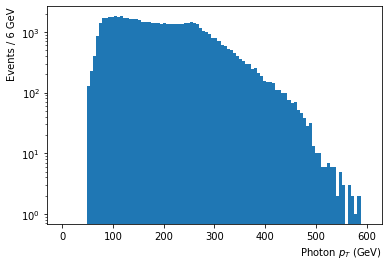

In [26]:
n_bins_pt = 100;
df['pt'].plot.hist(bins=n_bins_pt,range=(0,600),log=True);
plt.xlabel('Photon $p_T$ (GeV)', horizontalalignment='right', x=1.0);
plt.ylabel('Events / '+str(int(600/n_bins_pt))+' GeV', horizontalalignment='right', y=1.0);

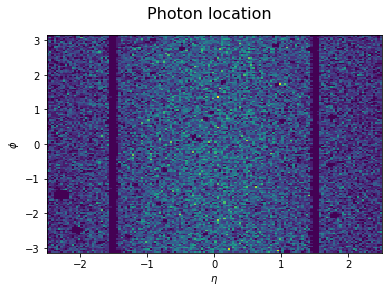

In [27]:

plt.hist2d(df['scEta'],df['scPhi'],bins=150); #weights=df['Event_weightAll']
plt.suptitle('Photon location',fontsize=16)
plt.xlabel('$\eta$');
plt.ylabel('$\phi$');

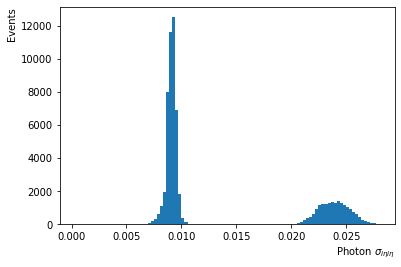

In [28]:
df['sigmaIetaIeta5x5'].plot.hist(bins=100,log=False); 
plt.xlabel('Photon $\sigma_{i\eta i\eta}$', horizontalalignment='right', x=1.0);
plt.ylabel('Events', horizontalalignment='right', y=1.0);

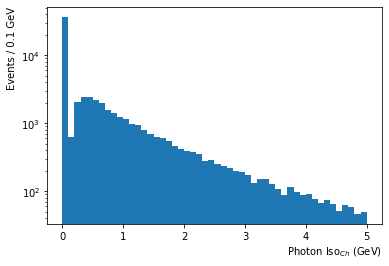

In [29]:
df['chargedHadIso03'].plot.hist(bins=50,log=True); #weights=df['Event_weightAll']
plt.xlabel('Photon Iso$_{Ch}$ (GeV)', horizontalalignment='right', x=1.0);
plt.ylabel('Events / '+str(5/50)+' GeV', horizontalalignment='right', y=1.0);